# Лабораторная работа №2-3.



## Обработка признаков. Часть 1.

### Загрузка необходимых библиотек.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline 
sns.set(style="ticks")

###Описание набора данных. Загрузка данных.

Набор данных __[Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv)__ содержит опрос пассажиров об их  удовлетворенности услугами авиакомпании. Содержание набора данных:

- **Gender:** пол пассажира [Female, Male] (женщина, мужчина)
- **Customer Type:** тип пассажира [Loyal/disloyal customer] (лояльный/нелояльный пассажир)
- **Age:** возраст пассажира
- **Type of Travel:** цель полета [Personal/Business Travel] (личная/рабочая поездка)
- **Class:** класс поездки в самолете [Business, Eco, Eco Plus] (бизнесс/эконом/эконом+ класс)
- **Flight distance:** расстояние полета 
- **Inflight wifi service:** уровень удовлетворенности услугой Wi-Fi в полете (0-  неприменимо;1-5)
- **Departure/Arrival time convenient:** уровень удовлетворенности удобным временем отправления/прибытия
- **Ease of Online booking:** уровень удовлетворенности онлайн-бронированием
- **Gate location:** уровень удовлетворенности расположением ворот
- **Food and drink:** уровень удовлетворенности едой и напитками
- **Online boarding:** уровень удовлетворенности онлайн-посадкой
- **Seat comfort:** уровень удовлетворенности комфортом сиденья
- **Inflight entertainment:** Уровень удовлетворенности развлечениями во время полета
- **On-board service:** уровень удовлетворенности обслуживанием на борту
- **Leg room service:** уровень удовлетворенности обслуживанием в номерах для ног
- **Baggage handling:** уровень удовлетворенности обработкой багажа
- **Check-in service:** уровень удовлетворенности обслуживанием при регистрации
- **Inflight service:** уровень удовлетворенности обслуживанием в полете
- **Cleanliness:** уровень удовлетворенности чистотой
- **Departure Delay in Minutes:** задержка отправления в минутах
- **Arrival Delay in Minutes:** задержка прибытия в минутах
- **Satisfaction:** уровень удовлетворенности авиакомпании [Satisfaction, neutral or dissatisfaction] (удовлетворен, нейтрально или неудовлетворен)

###Загрузка набора данных

In [3]:
data = pd.read_csv('/content/drive/MyDrive/train.csv', sep=",")
# Первые 5 строк датасета
data = data.drop(['id', 'Unnamed: 0'], axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Обработка пропусков

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 103904


In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Arrival Delay in Minutes. Тип данных float64. Количество пустых значений 310, 0.3%.


In [12]:
data = data.dropna(axis=0, how='any')
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Кодирование категориальных признаков

#### Кодирование категориальных признаков методом LableEncoder

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_le = le.fit_transform(data['satisfaction'])
data['satisfaction'] = data_le

#data_le = le.fit_transform(data['Class'])
#data['Class'] = data_le

data_le = le.fit_transform(data['Type of Travel'])
data['Type of Travel'] = data_le

data_le = le.fit_transform(data['Customer Type'])
data['Customer Type'] = data_le

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,0,13,1,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,1,25,0,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,0,26,0,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,0,25,0,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,0,61,0,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#### Кодирование методом OneHotEncoder

In [14]:
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()

encod = pd.get_dummies(data['Class'])
data = data.join(encod)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,Male,0,13,1,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,0,0,0,1
1,Male,1,25,0,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,0,1,0,0
2,Female,0,26,0,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,1,1,0,0
3,Female,0,25,0,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,0,1,0,0
4,Male,0,61,0,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,1,23,0,Eco,192,2,1,2,3,...,4,2,3,2,3,0.0,0,0,1,0
103900,Male,0,49,0,Business,2347,4,4,4,4,...,5,5,5,4,0,0.0,1,1,0,0
103901,Male,1,30,0,Business,1995,1,1,1,3,...,4,5,5,4,7,14.0,0,1,0,0
103902,Female,1,22,0,Eco,1000,1,1,1,5,...,1,5,4,1,0,0.0,0,0,1,0


### Нормализация числовых признаков

In [16]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

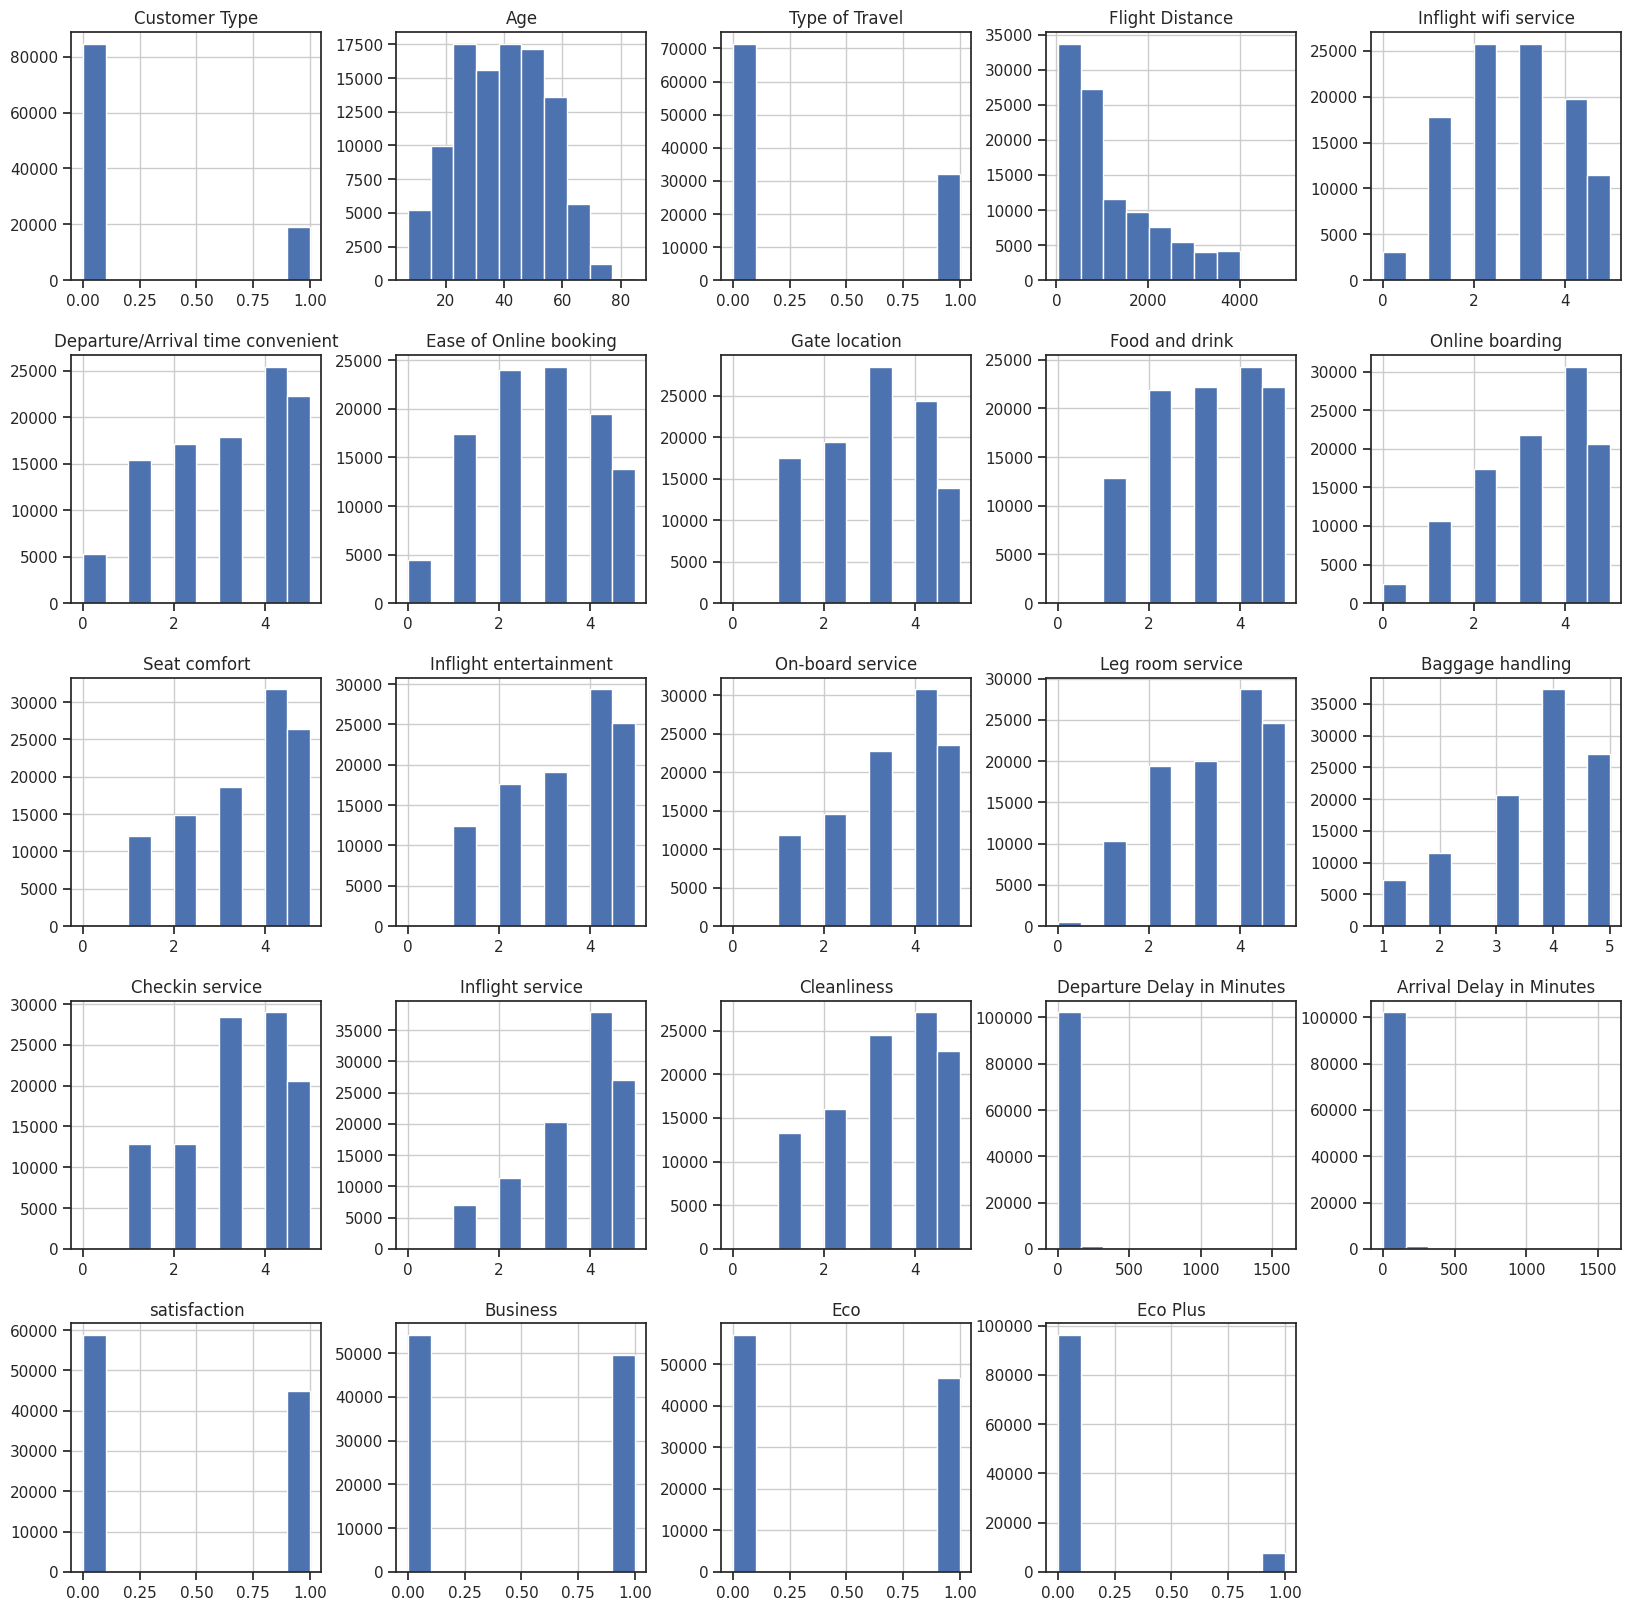

In [17]:
data.hist(figsize=(20,20))
plt.show()

####Исходное распределение

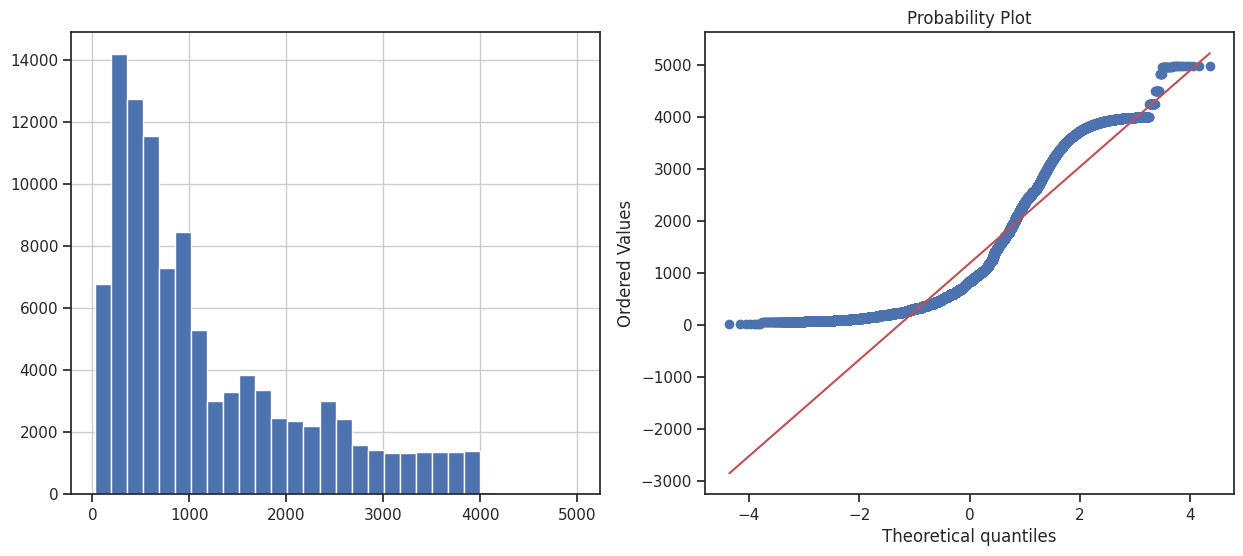

In [18]:
diagnostic_plots(data, 'Flight Distance')

#### Логарифмическое преобразование

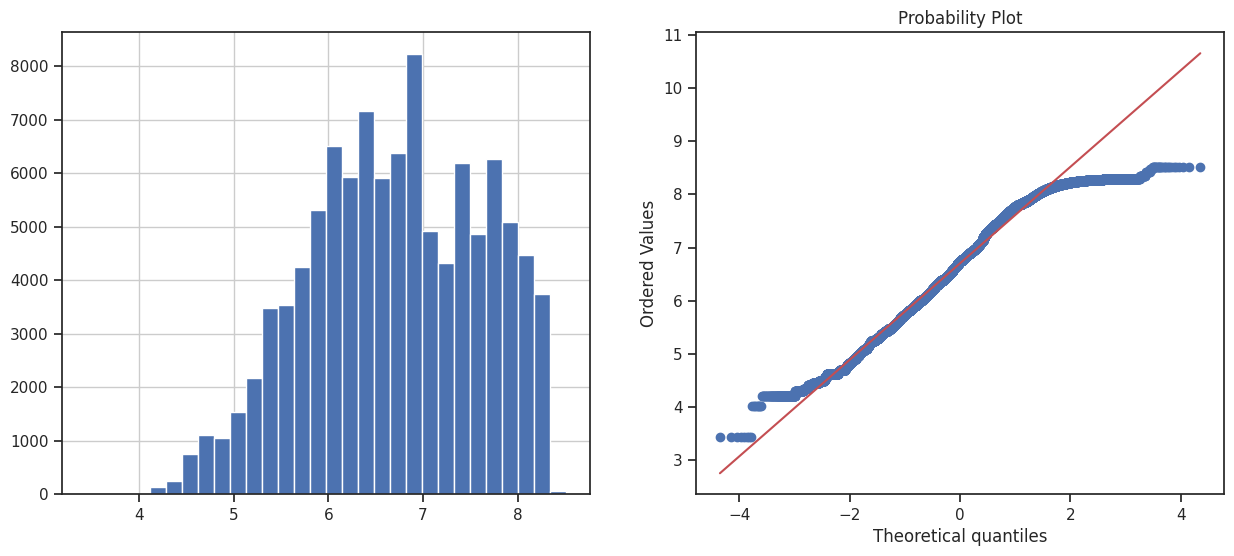

In [19]:
data['FlightDistance_log'] = np.log(data['Flight Distance'])
diagnostic_plots(data, 'FlightDistance_log')

#### Обратное преобразование

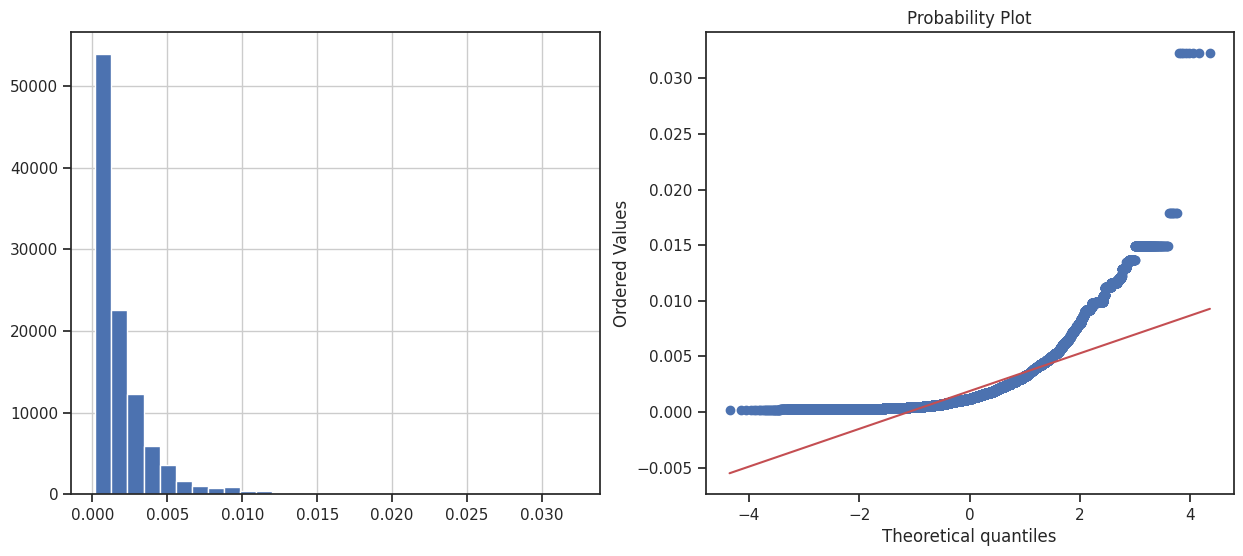

In [20]:
data['FlightDistance_reciprocal'] = 1 / (data['Flight Distance']) 
diagnostic_plots(data, 'FlightDistance_reciprocal')

#### Квадратный корень

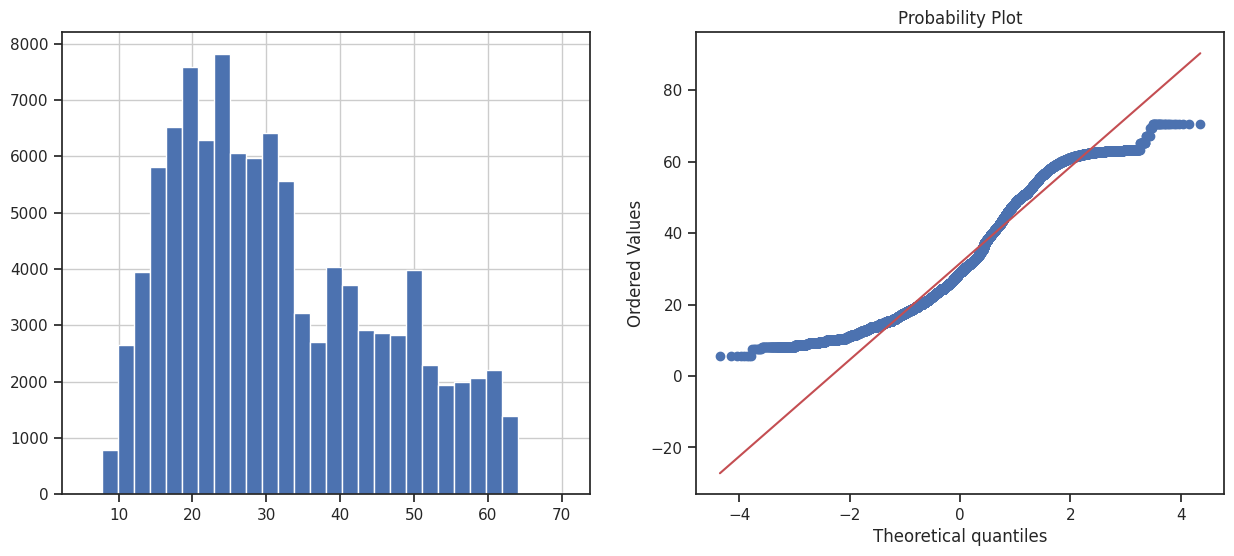

In [21]:
data['FlightDistance_sqr'] = data['Flight Distance']**(1/2) 
diagnostic_plots(data, 'FlightDistance_sqr')

#### Возведение в степень

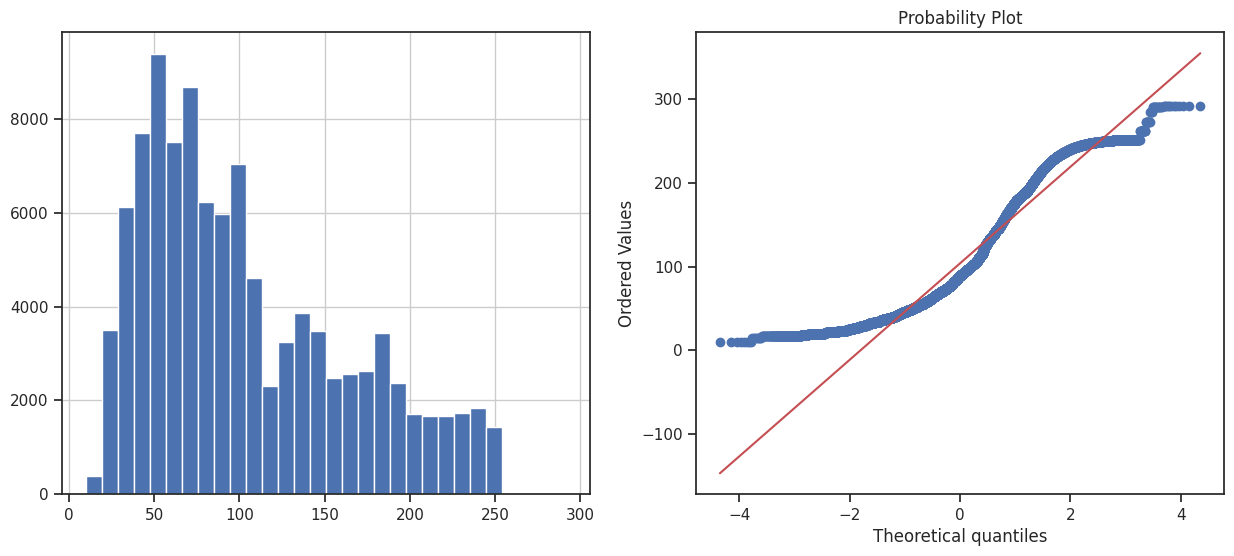

In [22]:
data['FlightDistance_exp1'] = data['Flight Distance']**(1/1.5)
diagnostic_plots(data, 'FlightDistance_exp1')

#### Преобразование Бокса-Кокса

Оптимальное значение λ = 0.10789152288906442


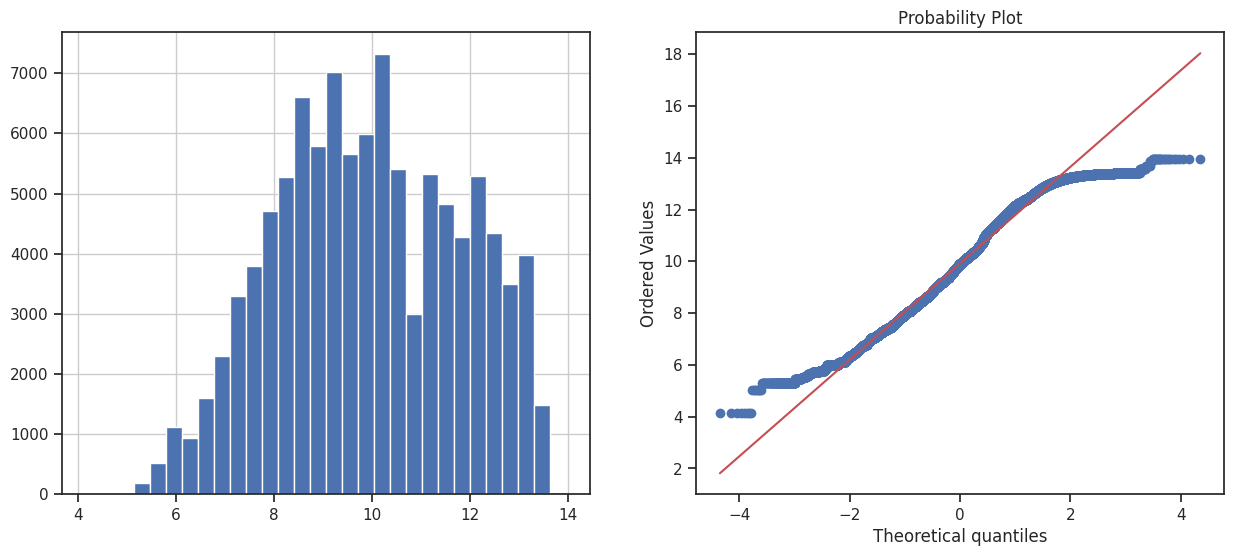

In [31]:
data['FlightDistance_boxcox'], param = stats.boxcox(data['Flight Distance']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'FlightDistance_boxcox')

#### Преобразование Йео-Джонсона

Оптимальное значение λ = 0.10648311553782307


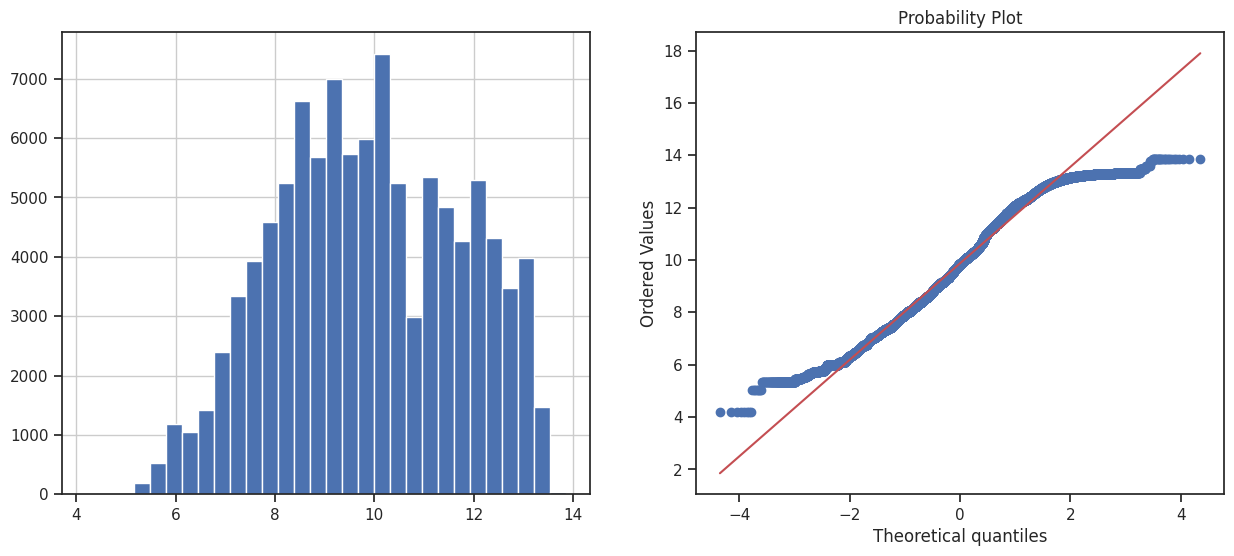

In [32]:
# Необходимо преобразовать данные к действительному типу
data['Flight Distance'] = data['Flight Distance'].astype('float')
data['FlightDistance_yeojohnson'], param = stats.yeojohnson(data['Flight Distance']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'FlightDistance_yeojohnson')